In [1]:
import tensorflow as tf
import keras as keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt

2023-10-16 18:45:36.593615: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 18:45:36.619618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-16 18:45:36.619652: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-16 18:45:36.619684: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 18:45:36.625602: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 18:45:36.626196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
from keras import backend as K
K.set_image_data_format("channels_last")

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes = num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes = num_classes)

In [5]:

model = Sequential()
model.add(Conv2D(32, (5, 5), strides = 1, input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides = 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

2023-10-16 18:45:39.502609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-10-16 18:45:39.502649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: gabriel-Dell-G15-5525
2023-10-16 18:45:39.502655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: gabriel-Dell-G15-5525
2023-10-16 18:45:39.502796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-10-16 18:45:39.502819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.113.1
2023-10-16 18:45:39.502825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.113.1


In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, verbose = 1)

Epoch 1/5
300/300 [==============================] - 5s 15ms/step - loss: 0.2503 - precision: 0.9594 - val_loss: 0.0766 - val_precision: 0.9815
Epoch 2/5
300/300 [==============================] - 4s 14ms/step - loss: 0.0738 - precision: 0.9820 - val_loss: 0.0620 - val_precision: 0.9819
Epoch 3/5
300/300 [==============================] - 4s 14ms/step - loss: 0.0526 - precision: 0.9863 - val_loss: 0.0444 - val_precision: 0.9867
Epoch 4/5
300/300 [==============================] - 4s 14ms/step - loss: 0.0412 - precision: 0.9891 - val_loss: 0.0413 - val_precision: 0.9876
Epoch 5/5
300/300 [==============================] - 4s 14ms/step - loss: 0.0355 - precision: 0.9903 - val_loss: 0.0358 - val_precision: 0.9879


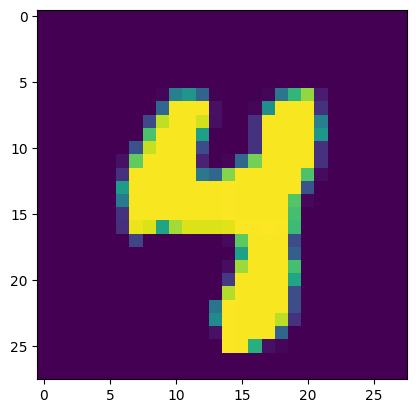

313/313 [==============================] - 0s 1ms/step


4

In [15]:
from random import randint
random_int = randint(0, 100)
plt.imshow(X_test[random_int])
plt.show()
prediction = model.predict(x=X_test)
prediction[random_int].argmax()